<a href="https://colab.research.google.com/github/MoriartyKang/ML_Project/blob/main/GRDP_Diabetes_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#공공건강데이터를 이용한 나이별 질병발생확률 예측분석
- 예측 분석을 통해 데이터간 상관관계과, 모델별 분류/회귀 성능 비교 및 분석
- 성능 평가와 데이터셋 검증

In [ ]:
# 라이브러리 설치
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score, mean_squared_error
from sklearn.metrics import r2_score, accuracy_score, roc_curve, auc
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import lightgbm as lgb

##데이터셋 불러오기

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
#데이터셋 링크:https://drive.google.com/file/d/161Vpu3SGgXOuSZ5tkJtCmB7R2ErsuJaz/view?usp=drive_link

df = pd.read_csv('/content/drive/MyDrive/study/data/diabetes_with_grdp.csv')
df.columns = df.columns.str.strip()

In [ ]:
# 연도별 컬럼 설정

years = ['2019', '2020', '2021', '2022']
f1_scores = {}
rmse_scores = {}

##모델 정의

In [ ]:
# 분류 모델 정의

classification_models = {
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "Random Forest": RandomForestClassifier(),
    "LightGBM": lgb.LGBMClassifier()
}

In [ ]:
# 회귀 모델 정의

regression_models = {
    "Linear Regression": LinearRegression(),
    "Random Forest": RandomForestRegressor(),
    "LightGBM": lgb.LGBMRegressor()
}

## 연도별 GRDP와 당뇨병 환자수 시각화

In [ ]:
years = ['2019', '2020', '2021', '2022']
avg_grdp = [df[f"{year}년"].mean() for year in years]
avg_patients = [df[f"{year}Y_Patients"].mean() for year in years]

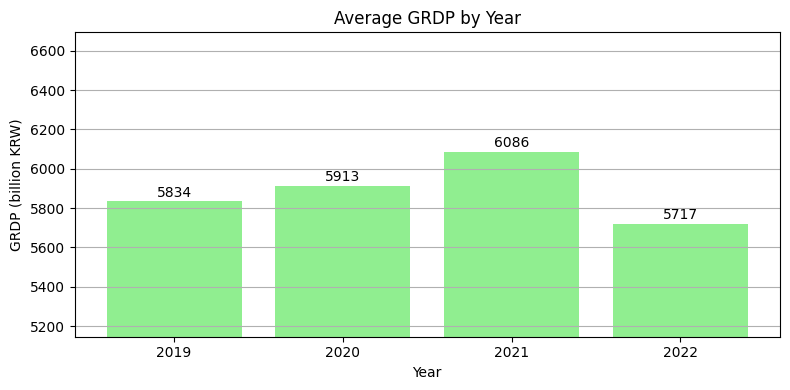

In [ ]:
# GRDP 막대그래프

plt.figure(figsize=(8, 4))
bars = plt.bar(years, avg_grdp, color='lightgreen')
plt.title('Average GRDP by Year')
plt.xlabel('Year')
plt.ylabel('GRDP (billion KRW)')
plt.ylim(min(avg_grdp)*0.9, max(avg_grdp)*1.1)  # y축 범위 조정
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, height + 10, f'{height:.0f}', ha='center', va='bottom')
plt.grid(axis='y')
plt.tight_layout()
plt.show()

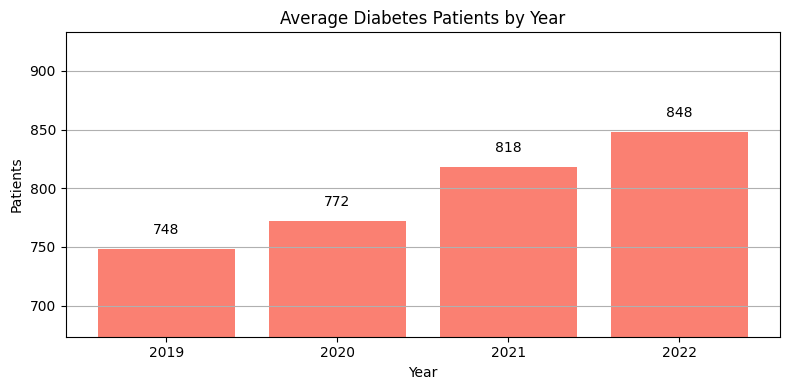

In [ ]:
# 당뇨병 환자 수 막대그래프

plt.figure(figsize=(8, 4))
bars = plt.bar(years, avg_patients, color='salmon')
plt.title('Average Diabetes Patients by Year')
plt.xlabel('Year')
plt.ylabel('Patients')
plt.ylim(min(avg_patients)*0.9, max(avg_patients)*1.1)  # y축 범위 조정
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, height + 10, f'{height:.0f}', ha='center', va='bottom')
plt.grid(axis='y')
plt.tight_layout()
plt.show()

##상관관계 분석

<ipython-input-44-e270442eda59>:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=years, y=correlations, palette='Blues_d')


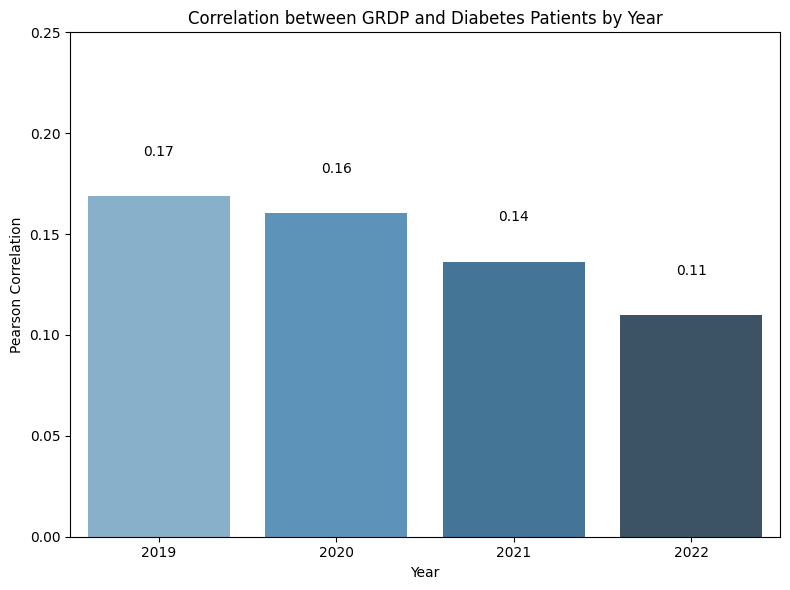

In [ ]:
# 연도별 상관계수 계산 (피어슨 상관계수)

correlations = []
for year in years:
    feature = f"{year}년"
    target = f"{year}Y_Patients"
    corr = df[[feature, target]].corr().iloc[0, 1]
    correlations.append(corr)

# 그래프 막대 시각화

plt.figure(figsize=(8, 6))
sns.barplot(x=years, y=correlations, palette='Blues_d')
plt.ylim(0, 1)
plt.title('Correlation between GRDP and Diabetes Patients by Year')
plt.xlabel('Year')
plt.ylabel('Pearson Correlation')
plt.ylim(0, 0.25)
for i, v in enumerate(correlations):
    plt.text(i, v + 0.02, f"{v:.2f}", ha='center')
plt.tight_layout()
plt.show()

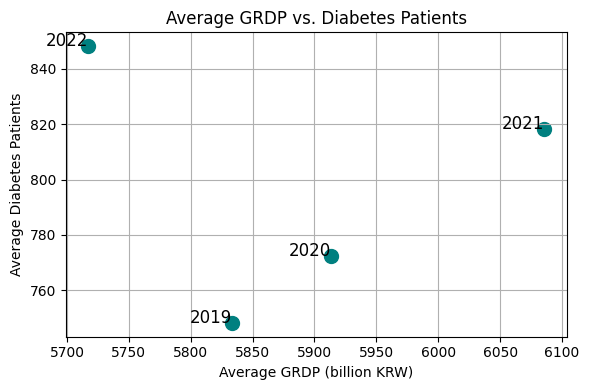

In [ ]:
# 산점도 시각화

plt.figure(figsize=(6, 4))
plt.scatter(avg_grdp, avg_patients, color='teal', s=100)

for i, year in enumerate(years):
    plt.text(avg_grdp[i], avg_patients[i], year, fontsize=12, ha='right')

plt.title("Average GRDP vs. Diabetes Patients")
plt.xlabel("Average GRDP (billion KRW)")
plt.ylabel("Average Diabetes Patients")
plt.grid(True)
plt.tight_layout()

##KMeans 클러스터링 분석

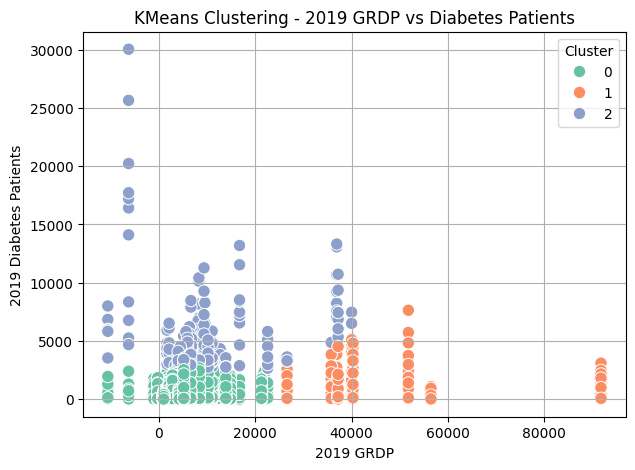

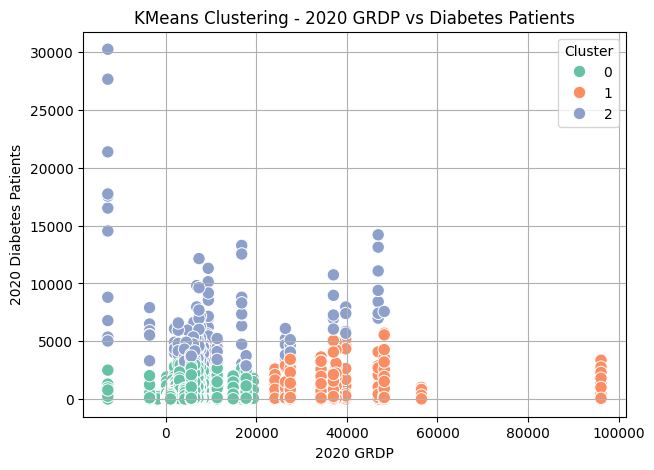

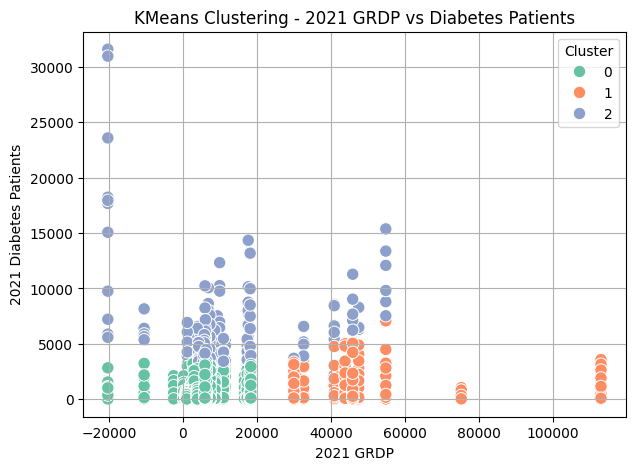

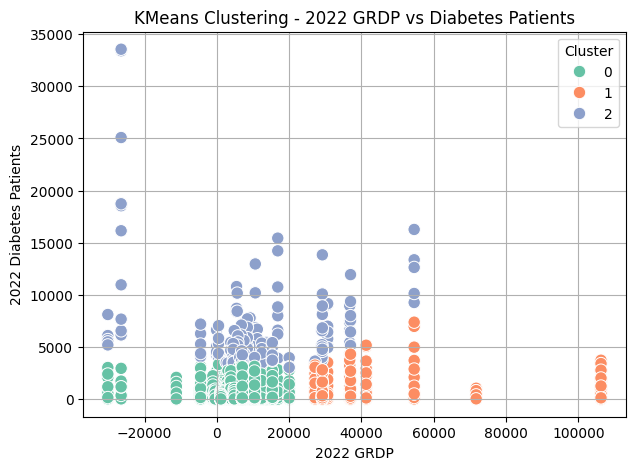

In [ ]:
for year in years:
    grdp_col = f"{year}년"
    patient_col = f"{year}Y_Patients"

    if grdp_col in df.columns and patient_col in df.columns:
        data = df[[grdp_col, patient_col]].dropna()
        if data.empty:
            continue

        # 표준화
        scaler = StandardScaler()
        data_scaled = scaler.fit_transform(data)

        # 클러스터링
        kmeans = KMeans(n_clusters=3, random_state=42)
        clusters = kmeans.fit_predict(data_scaled)

        # 클러스터 결과 저장
        data['Cluster'] = clusters

        # 시각화
        plt.figure(figsize=(7, 5))
        sns.scatterplot(
            data=data, x=grdp_col, y=patient_col,
            hue='Cluster', palette='Set2', s=80
        )
        plt.title(f"KMeans Clustering - {year} GRDP vs Diabetes Patients")
        plt.xlabel(f"{year} GRDP")
        plt.ylabel(f"{year} Diabetes Patients")
        plt.grid(True)
        plt.legend(title="Cluster")
        plt.show()

##모델별 F1 스코어(분류)와 RMSE(회귀) 시각화 및 비교 분석

In [ ]:
# 연도별 F1, RMSE 계산을 위한 모델 학습

f1_scores = {}
rmse_scores = {}

for year in years:
    feature = f"{year}년"
    target = f"{year}Y_Patients"

    df_year = df.dropna(subset=[feature, target])
    X = df_year[[feature]]
    y = df_year[target]

    # 분류를 위한 이진 타겟 생성

    y_class = (y > y.mean()).astype(int)

    X_train, X_test, y_train_cls, y_test_cls = train_test_split(X, y_class, test_size=0.2, random_state=42)
    _, _, y_train_reg, y_test_reg = train_test_split(X, y, test_size=0.2, random_state=42)

    best_f1 = 0
    best_rmse = float('inf')

    for name, model in classification_models.items():
        model.fit(X_train, y_train_cls)
        preds = model.predict(X_test)
        score = f1_score(y_test_cls, preds)
        f1_scores.setdefault(name, []).append(round(score, 3))
        best_f1 = max(best_f1, score)

    for name, model in regression_models.items():
        model.fit(X_train, y_train_reg)
        preds = model.predict(X_test)
        rmse = mean_squared_error(y_test_reg, preds, squared=False) if 'squared' in mean_squared_error.__code__.co_varnames else mean_squared_error(y_test_reg, preds) ** 0.5
        rmse_scores.setdefault(name, []).append(round(rmse, 1))
        best_rmse = min(best_rmse, rmse)

[LightGBM] [Info] Number of positive: 650, number of negative: 2102
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000073 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 173
[LightGBM] [Info] Number of data points in the train set: 2752, number of used features: 1
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.236192 -> initscore=-1.173672
[LightGBM] [Info] Start training from score -1.173672
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000050 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 173
[LightGBM] [Info] Number of data points in the train set: 2752, number of used features: 1
[LightGBM] [Info] Start training from score 732.956032
[LightGBM] [Info] Number of positive: 642, number of negative: 2110
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000065 seconds.

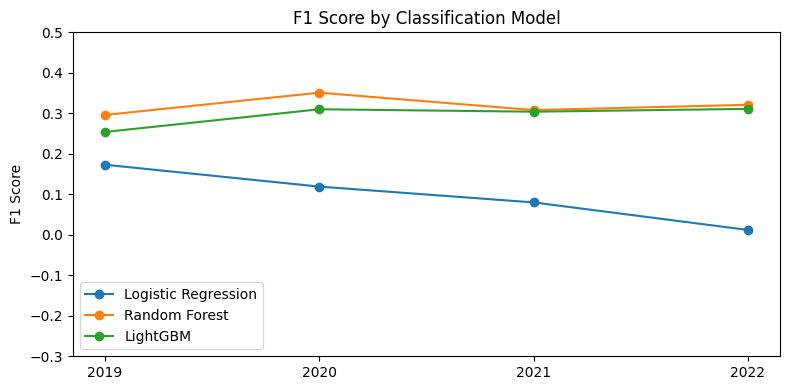

In [ ]:
# 분류 모델 평가 (F1 Score)
plt.figure(figsize=(8, 4))
for model, scores in f1_scores.items():
    plt.plot(years, scores, marker='o', label=model)
plt.title('F1 Score by Classification Model')
plt.ylabel('F1 Score')
plt.ylim(-0.3, 0.5)
plt.legend()
plt.tight_layout()
plt.show()

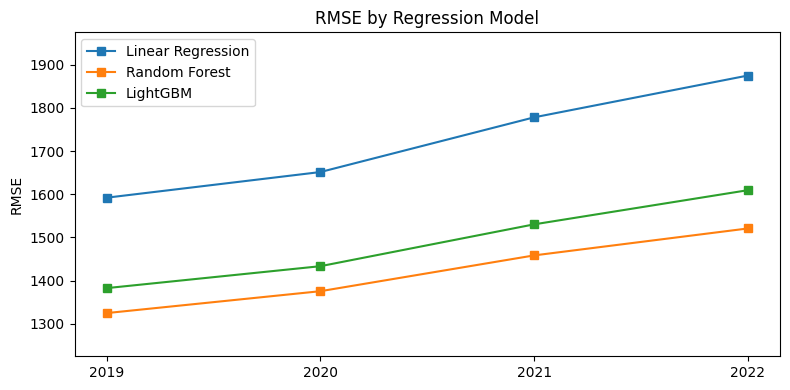

In [ ]:
# 회귀 모델 평가 (RMSE)

plt.figure(figsize=(8, 4))
for model, scores in rmse_scores.items():
    plt.plot(years, scores, marker='s', label=model)
plt.title('RMSE by Regression Model')
plt.ylabel('RMSE')
plt.ylim(min(min(rmse_scores.values(), key=min)) - 100, max(max(rmse_scores.values(), key=max)) + 100)
plt.legend()
plt.tight_layout()
plt.show()

##모델별 R2, ROC 시각화

In [ ]:
# R2, ROC 시각화 위한 학습
# 학습 데이터 변수로 GRDP, 환자수 기울기 사용

def calc_slope(values):
    X_years = np.array([2019, 2020, 2021, 2022]).reshape(-1, 1)
    y_values = np.array(values).reshape(-1, 1)
    model = LinearRegression().fit(X_years, y_values)
    return model.coef_[0][0]

df = df.dropna(subset=[
    '2019년', '2020년', '2021년', '2022년',
    '2019Y_Patients', '2020Y_Patients', '2021Y_Patients', '2022Y_Patients'
])

# 파생 변수 생성

df["GRDP_기울기"] = df[["2019년", "2020년", "2021년", "2022년"]].apply(calc_slope, axis=1)
df["환자_기울기"] = df[["2019Y_Patients", "2020Y_Patients", "2021Y_Patients", "2022Y_Patients"]].apply(calc_slope, axis=1)


# 입력 및 타겟 정의

X = df[["GRDP_기울기"]]
y_reg = df["환자_기울기"]
y_clf = (df["환자_기울기"] > 0).astype(int)  # 증가 여부로 분류

# 학습/테스트 분리

X_train, X_test, y_reg_train, y_reg_test, y_clf_train, y_clf_test = train_test_split(
    X, y_reg, y_clf, test_size=0.2, random_state=42)

[LightGBM] [Info] Number of positive: 1754, number of negative: 998
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000075 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 173
[LightGBM] [Info] Number of data points in the train set: 2752, number of used features: 1
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.637355 -> initscore=0.563901
[LightGBM] [Info] Start training from score 0.563901


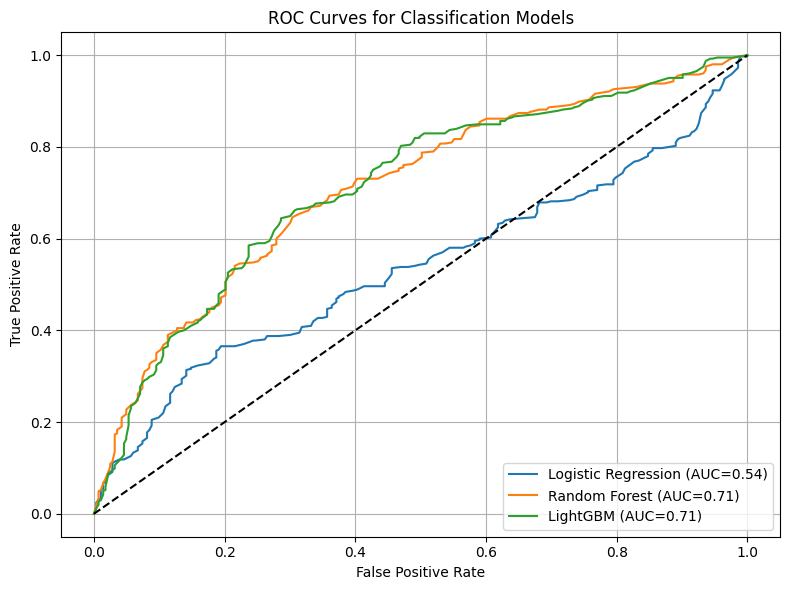

In [ ]:
# 분류 모델 평가 (ROC)

accuracy_scores = {}
roc_probas = {}
for name, model in classification_models.items():
    model.fit(X_train, y_clf_train)
    preds = model.predict(X_test)
    proba = model.predict_proba(X_test)[:, 1] if hasattr(model, "predict_proba") else preds
    acc = accuracy_score(y_clf_test, preds)
    accuracy_scores[name] = acc
    roc_probas[name] = proba

plt.figure(figsize=(8, 6))
for name, proba in roc_probas.items():
    fpr, tpr, _ = roc_curve(y_clf_test, proba)
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, label=f"{name} (AUC={roc_auc:.2f})")

plt.plot([0, 1], [0, 1], 'k--')
plt.title("ROC Curves for Classification Models")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend(loc="lower right")
plt.grid(True)
plt.tight_layout()
plt.show()

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000049 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 173
[LightGBM] [Info] Number of data points in the train set: 2752, number of used features: 1
[LightGBM] [Info] Start training from score 33.567188


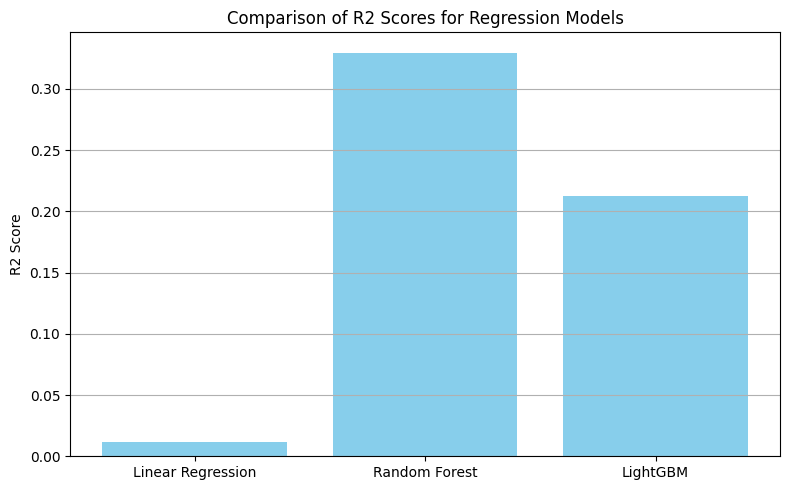

In [ ]:
# 회귀 모델 평가 (R2)

r2_scores = {}
for name, model in regression_models.items():
    model.fit(X_train, y_reg_train)
    preds = model.predict(X_test)
    r2 = r2_score(y_reg_test, preds)
    r2_scores[name] = r2

plt.figure(figsize=(8, 5))
plt.bar(r2_scores.keys(), r2_scores.values(), color="skyblue")
plt.title("Comparison of R2 Scores for Regression Models")
plt.ylabel("R2 Score")
plt.grid(True, axis='y')
plt.tight_layout()
plt.show()

In [ ]:
# 결과 요약 표 (회귀 + 분류 통합)

regression_df = pd.DataFrame({
    "Model": list(r2_scores.keys()),
    "R2": list(r2_scores.values()),
    "Accuracy": [None] * len(r2_scores)
})

classification_df = pd.DataFrame({
    "Model": list(accuracy_scores.keys()),
    "R2": [None] * len(accuracy_scores),
    "Accuracy": list(accuracy_scores.values())
})

summary_df = pd.concat([regression_df, classification_df], ignore_index=True)

print("___________전체 알고리즘 성능 요약표___________")
print(summary_df.sort_values(["Accuracy", "R2"], ascending=False))


___________전체 알고리즘 성능 요약표___________
                 Model        R2  Accuracy
5             LightGBM       NaN  0.690407
4        Random Forest       NaN  0.668605
3  Logistic Regression       NaN  0.588663
1        Random Forest  0.329622       NaN
2             LightGBM  0.212730       NaN
0    Linear Regression  0.011470       NaN


<ipython-input-53-a7303030a3ff>:14: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  summary_df = pd.concat([regression_df, classification_df], ignore_index=True)
